<a href="https://colab.research.google.com/github/levi178u/Hackodisha/blob/main/Fradulence_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')



data= pd.read_csv('/content/Training_data.csv')
data_test = pd.read_csv('/content/Testing_data .csv')
data.head(10)


,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,isFlaggedFraud,Transaction_Date,Transaction_Time,Coordinates,ip_addresses
0,1,PAYMENT,9839.64,ACC10204397,170136.00,160296.36,ACC18330495,0.0,0.00,0,0,06-06-24,00:34:36,"(43.550740883275296, -141.72974723173664)",15.246.64.212
1,2,PAYMENT,1864.28,ACC36787793,21249.00,19384.72,ACC43829436,0.0,0.00,0,0,16-07-24,19:13:41,"(78.74630788793377, -2.8864833917104136)",29.13.180.155
2,3,TRANSFER,181.00,ACC69442839,181.00,0.00,ACC19495987,0.0,0.00,1,0,24-02-24,07:29:34,"(-48.70562123207855, 3.433940326483139)",132.7.36.190
3,4,CASH_OUT,181.00,ACC13673580,181.00,0.00,ACC94944418,21182.0,0.00,1,0,30-12-24,04:48:05,"(-54.63748785685925, 60.509022769098294)",153.105.24.95
4,5,PAYMENT,11668.14,ACC46873273,41554.00,29885.86,ACC17787237,0.0,0.00,0,0,17-04-24,05:54:56,"(-57.96291770179832, -99.23770861640779)",161.203.207.51
5,6,PAYMENT,7817.71,ACC84508864,53860.00,46042.29,ACC67530981,0.0,0.00,0,0,25-09-24,11:26:13,"(21.923751935157796, 135.6968762975912)",141.227.154.31
6,7,PAYMENT,7107.77,ACC43559957,183195.00,176087.23,ACC86690831,0.0,0.00,0,0,28-04-24,18:29:42,"(-83.83903479292408, -136.8807093894966)",18.151.66.37
7,8,PAYMENT,7861.64,ACC81042647,176087.23,168225.59,ACC97891146,0.0,0.00,0,0,27-02-24,13:05:46,"(-25.95184756465001, 79.06697397817305)",104.9.12.103
8,9,PAYMENT,4024.36,ACC41426604,2671.00,0.00,ACC74713816,0.0,0.00,0,0,13-04-24,11:26:05,"(67.30427834734033, 64.66394988831104)",139.50.143.112
9,10,DEBIT,5337.77,ACC95900894,41720.00,36382.23,ACC60296984,41898.0,40348.79,0,0,02-07-24,15:49:31,"(34.92976887714575, -63.005535432983436)",98.145.54.164


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_id      699 non-null    int64  
 1   Transfer_type       699 non-null    object 
 2   Amount              699 non-null    float64
 3   Sender_account      699 non-null    object 
 4   Initial_balance_p1  699 non-null    float64
 5   new_balance_1       699 non-null    float64
 6   Recipient_account   699 non-null    object 
 7   Initial_balance_p2  699 non-null    float64
 8   new_balance_2       699 non-null    float64
 9   isFraud             699 non-null    int64  
 10  isFlaggedFraud      699 non-null    int64  
 11  Transaction_Date    699 non-null    object 
 12  Transaction_Time    699 non-null    object 
 13  Coordinates         699 non-null    object 
 14  ip_addresses        699 non-null    object 
dtypes: float64(5), int64(3), object(7)
memory usage: 82.0+ KB

Data preprocessing part

In [255]:
data.dropna(inplace=True)

Text(0, 0.5, 'count of online transaction type ')

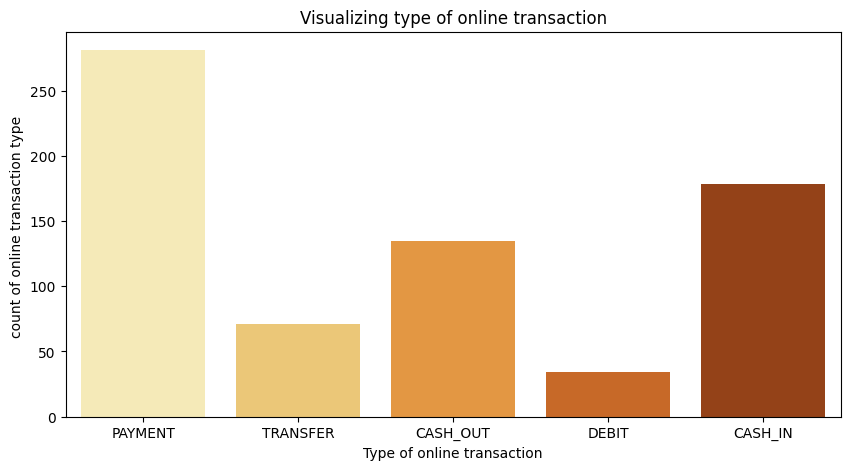

In [256]:
plt.figure(figsize=(10,5))
sns.countplot(x="Transfer_type", data=data, palette="YlOrBr")
plt.title("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

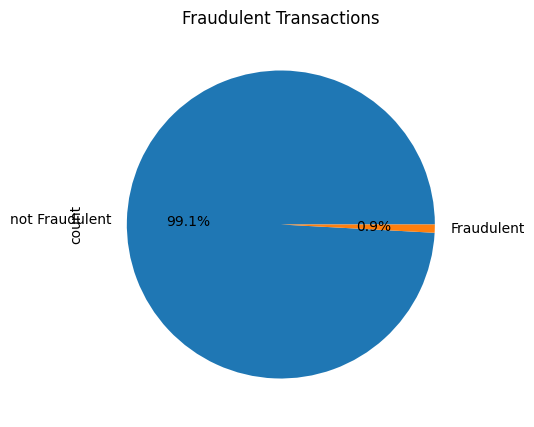

In [257]:
def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"


data["fraud_transaction_label"] = data["isFraud"].apply(Fraud)


plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
data.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')

In [258]:
data.fraud_transaction_label.value_counts()

,count
fraud_transaction_label,
not Fraudulent,693
Fraudulent,6


In [259]:
fradulent_part =6/693 *100


fradulent_part


0.8658008658008658

In [260]:
#Here it means 86.6% approx. of the data in the dataset is tagged as fradulent

!pip install cmocean

<Axes: xlabel='Transfer_type', ylabel='Amount'>

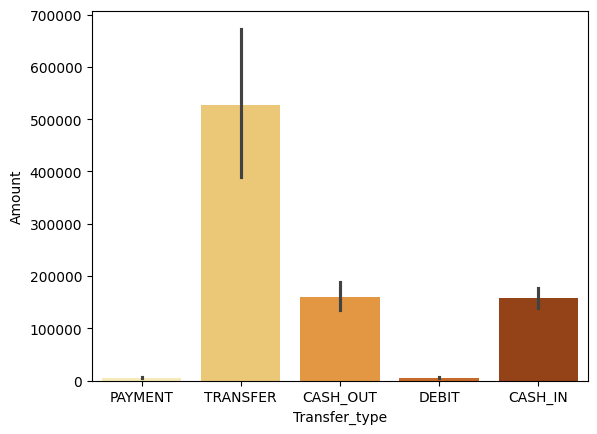

In [261]:
import cmocean

sns.barplot(x='Transfer_type',y='Amount',data=data, palette = 'YlOrBr')

Text(0, 0.5, 'fraud_transaction_label')

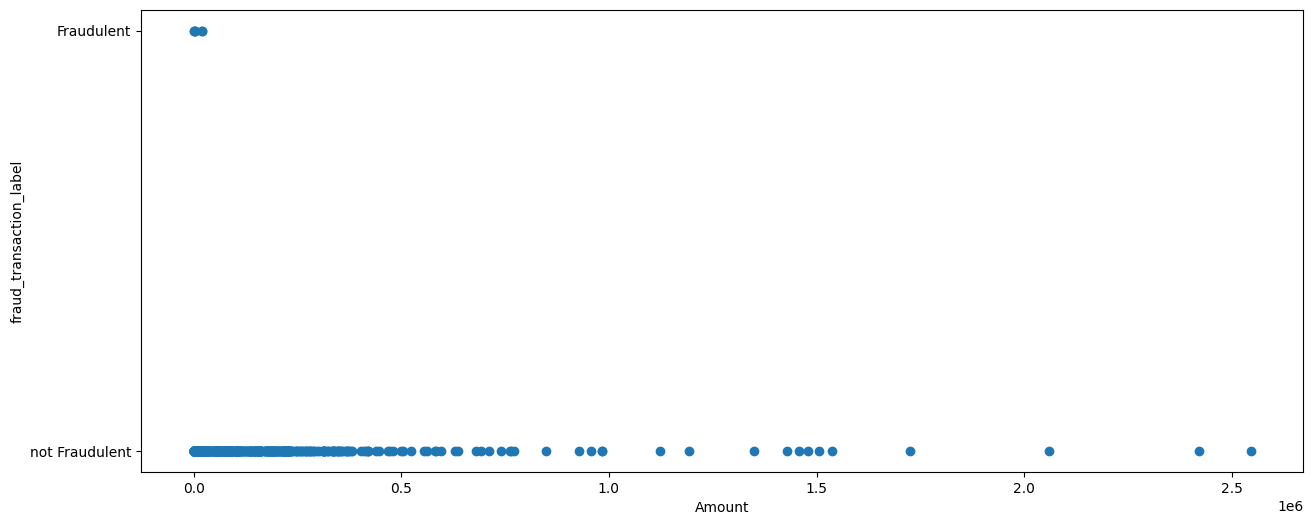

In [262]:
plt.figure(figsize=(15,6))
plt.scatter(x='Amount',y='fraud_transaction_label',data=data)
plt.xlabel('Amount')
plt.ylabel('fraud_transaction_label')

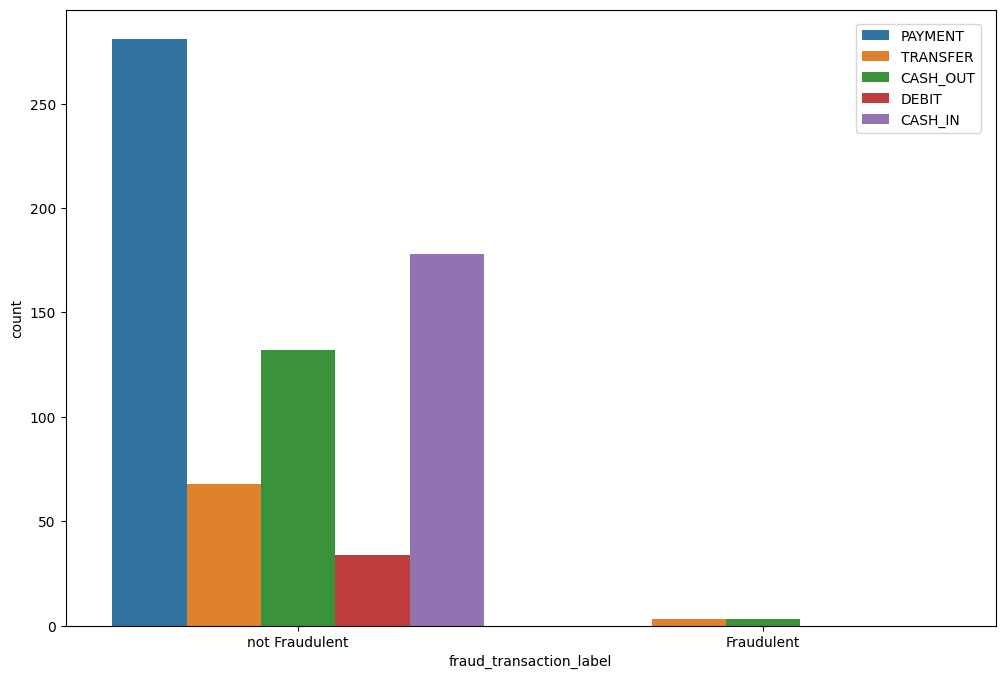

In [263]:

plt.figure(figsize=(12,8))
sns.countplot(x='fraud_transaction_label',data=data,hue='Transfer_type')
plt.legend(loc=[0.85,0.8])

<Axes: xlabel='Transfer_type', ylabel='Transaction_id'>

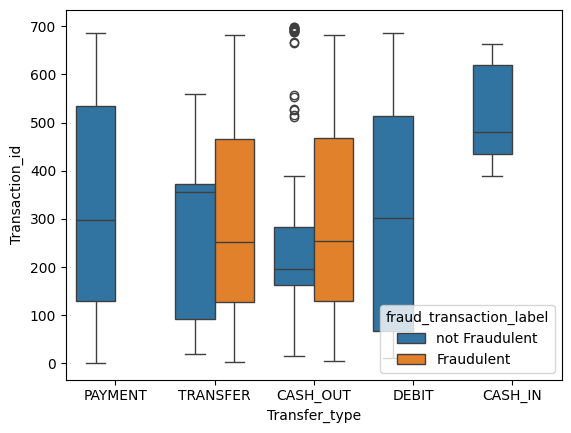

In [264]:
sns.boxplot(x= "Transfer_type", y= "Transaction_id", hue ="fraud_transaction_label", data= data)

<Axes: >

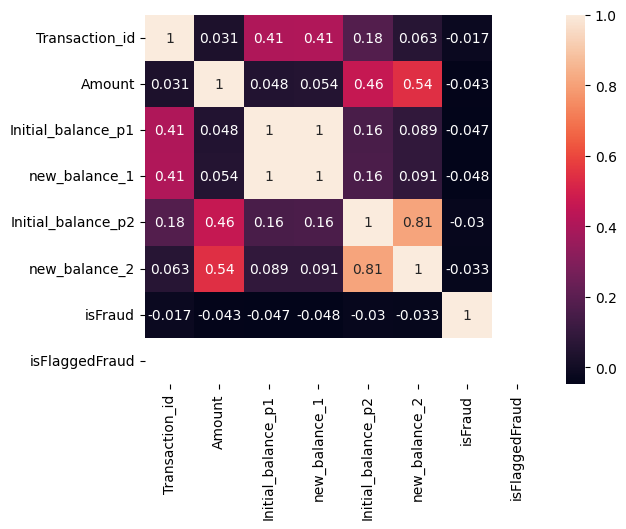

In [265]:
num_features = data.select_dtypes(include=['number']).columns
core = data[num_features].corr()
sns.heatmap(core, annot=True)

In [266]:
categorical = ['Transfer_type']

categories_dummies = pd.get_dummies(data[categorical])
categories_dummies.head()

,Transfer_type_CASH_IN,Transfer_type_CASH_OUT,Transfer_type_DEBIT,Transfer_type_PAYMENT,Transfer_type_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False


In [267]:
data= pd.concat([data,categories_dummies], axis=1)

print(data.shape)
data.head()

(699, 21)


,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,...,Transaction_Date,Transaction_Time,Coordinates,ip_addresses,fraud_transaction_label,Transfer_type_CASH_IN,Transfer_type_CASH_OUT,Transfer_type_DEBIT,Transfer_type_PAYMENT,Transfer_type_TRANSFER
0,1,PAYMENT,9839.64,ACC10204397,170136.0,160296.36,ACC18330495,0.0,0.0,0,...,06-06-24,00:34:36,"(43.550740883275296, -141.72974723173664)",15.246.64.212,not Fraudulent,False,False,False,True,False
1,2,PAYMENT,1864.28,ACC36787793,21249.0,19384.72,ACC43829436,0.0,0.0,0,...,16-07-24,19:13:41,"(78.74630788793377, -2.8864833917104136)",29.13.180.155,not Fraudulent,False,False,False,True,False
2,3,TRANSFER,181.00,ACC69442839,181.0,0.00,ACC19495987,0.0,0.0,1,...,24-02-24,07:29:34,"(-48.70562123207855, 3.433940326483139)",132.7.36.190,Fraudulent,False,False,False,False,True
3,4,CASH_OUT,181.00,ACC13673580,181.0,0.00,ACC94944418,21182.0,0.0,1,...,30-12-24,04:48:05,"(-54.63748785685925, 60.509022769098294)",153.105.24.95,Fraudulent,False,True,False,False,False
4,5,PAYMENT,11668.14,ACC46873273,41554.0,29885.86,ACC17787237,0.0,0.0,0,...,17-04-24,05:54:56,"(-57.96291770179832, -99.23770861640779)",161.203.207.51,not Fraudulent,False,False,False,True,False


In [268]:
#remove the initial categorical columns now that we have encoded them
data.drop(columns=['fraud_transaction_label'], inplace=True)

In [269]:
data.head()

,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,isFlaggedFraud,Transaction_Date,Transaction_Time,Coordinates,ip_addresses,Transfer_type_CASH_IN,Transfer_type_CASH_OUT,Transfer_type_DEBIT,Transfer_type_PAYMENT,Transfer_type_TRANSFER
0,1,PAYMENT,9839.64,ACC10204397,170136.0,160296.36,ACC18330495,0.0,0.0,0,0,06-06-24,00:34:36,"(43.550740883275296, -141.72974723173664)",15.246.64.212,False,False,False,True,False
1,2,PAYMENT,1864.28,ACC36787793,21249.0,19384.72,ACC43829436,0.0,0.0,0,0,16-07-24,19:13:41,"(78.74630788793377, -2.8864833917104136)",29.13.180.155,False,False,False,True,False
2,3,TRANSFER,181.00,ACC69442839,181.0,0.00,ACC19495987,0.0,0.0,1,0,24-02-24,07:29:34,"(-48.70562123207855, 3.433940326483139)",132.7.36.190,False,False,False,False,True
3,4,CASH_OUT,181.00,ACC13673580,181.0,0.00,ACC94944418,21182.0,0.0,1,0,30-12-24,04:48:05,"(-54.63748785685925, 60.509022769098294)",153.105.24.95,False,True,False,False,False
4,5,PAYMENT,11668.14,ACC46873273,41554.0,29885.86,ACC17787237,0.0,0.0,0,0,17-04-24,05:54:56,"(-57.96291770179832, -99.23770861640779)",161.203.207.51,False,False,False,True,False


In [270]:
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'], format='%d-%m-%y')
data['Transaction_Time'] = pd.to_datetime(data['Transaction_Time'], format='%H:%M:%S').dt.time


In [271]:
data[['Latitude', 'Longitude']] = data['Coordinates'].str.extract(r'\(([^,]+), ([^,]+)\)')
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)


data.drop(columns=['Coordinates', 'Transaction_Time'], inplace=True)
data.head()


,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,isFlaggedFraud,Transaction_Date,ip_addresses,Transfer_type_CASH_IN,Transfer_type_CASH_OUT,Transfer_type_DEBIT,Transfer_type_PAYMENT,Transfer_type_TRANSFER,Latitude,Longitude
0,1,PAYMENT,9839.64,ACC10204397,170136.0,160296.36,ACC18330495,0.0,0.0,0,0,2024-06-06,15.246.64.212,False,False,False,True,False,43.550741,-141.729747
1,2,PAYMENT,1864.28,ACC36787793,21249.0,19384.72,ACC43829436,0.0,0.0,0,0,2024-07-16,29.13.180.155,False,False,False,True,False,78.746308,-2.886483
2,3,TRANSFER,181.00,ACC69442839,181.0,0.00,ACC19495987,0.0,0.0,1,0,2024-02-24,132.7.36.190,False,False,False,False,True,-48.705621,3.433940
3,4,CASH_OUT,181.00,ACC13673580,181.0,0.00,ACC94944418,21182.0,0.0,1,0,2024-12-30,153.105.24.95,False,True,False,False,False,-54.637488,60.509023
4,5,PAYMENT,11668.14,ACC46873273,41554.0,29885.86,ACC17787237,0.0,0.0,0,0,2024-04-17,161.203.207.51,False,False,False,True,False,-57.962918,-99.237709


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction_id          699 non-null    int64         
 1   Transfer_type           699 non-null    object        
 2   Amount                  699 non-null    float64       
 3   Sender_account          699 non-null    object        
 4   Initial_balance_p1      699 non-null    float64       
 5   new_balance_1           699 non-null    float64       
 6   Recipient_account       699 non-null    object        
 7   Initial_balance_p2      699 non-null    float64       
 8   new_balance_2           699 non-null    float64       
 9   isFraud                 699 non-null    int64         
 10  isFlaggedFraud          699 non-null    int64         
 11  Transaction_Date        699 non-null    datetime64[ns]
 12  ip_addresses            699 non-null    object    

In [273]:
data.describe()

,Transaction_id,Amount,Initial_balance_p1,new_balance_1,Initial_balance_p2,new_balance_2,isFraud,isFlaggedFraud,Transaction_Date,Latitude,Longitude
count,699.000000,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,699.000000,699.0,699,699.000000,699.000000
mean,350.000000,1.269811e+05,1.217855e+06,1.252809e+06,7.175774e+05,1.299207e+06,0.008584,0.0,2024-06-30 07:45:34.763948800,0.780455,-1.929715
min,1.000000,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,2024-01-02 00:00:00,-89.569855,-179.467471
25%,175.500000,4.859210e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,2024-03-30 00:00:00,-43.278919,-88.906294
50%,350.000000,2.153096e+04,1.986900e+04,1.076672e+04,5.790166e+04,0.000000e+00,0.000000,0.0,2024-06-26 00:00:00,-0.944188,-2.886483
75%,524.500000,1.588854e+05,6.697019e+05,7.150038e+05,5.076523e+05,9.714189e+05,0.000000,0.0,2024-09-27 00:00:00,43.502462,86.278912
max,699.000000,2.545478e+06,9.716462e+06,9.987287e+06,1.700100e+07,1.916920e+07,1.000000,0.0,2024-12-30 00:00:00,89.942208,179.187398
std,201.928205,2.600370e+05,2.399673e+06,2.455111e+06,2.166217e+06,3.707629e+06,0.092316,0.0,NaN,51.128015,103.377859


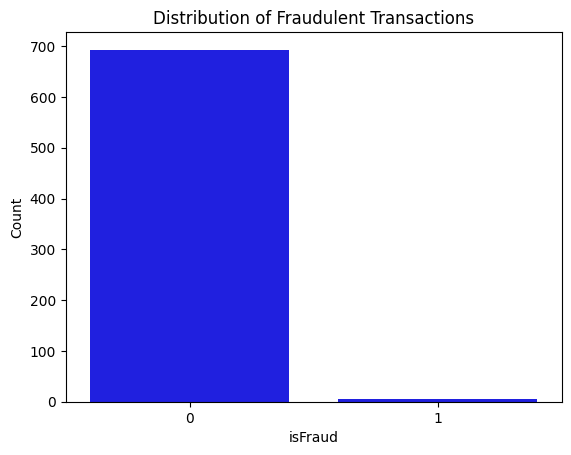

In [274]:
sns.countplot(x='isFraud', data=data, color='blue')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()



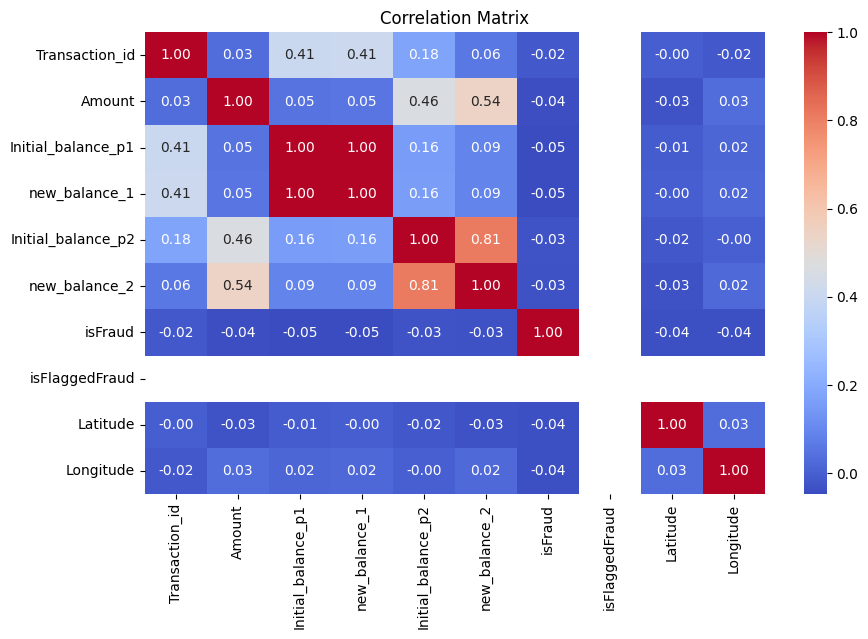

In [275]:
num_features = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))
sns.heatmap(data[num_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [276]:
data['balance_change'] = data['Initial_balance_p1'] - data['new_balance_1']


data['balance_1_ratio'] = data['Initial_balance_p1'] / (data['Initial_balance_p1'] + 1)
data['balance_2_ratio'] = data['Initial_balance_p2'] / (data['Initial_balance_p2'] + 1)

In [305]:

data['amount_to_avg_ratio'] = data['Amount'] / (data['average_transaction_amount'] + 1)
data = pd.get_dummies(data, columns=['ip_addresses'], drop_first=True)


In [306]:

print(data.columns)


Index(['Transaction_id', 'Transfer_type', 'Amount', 'Sender_account',
       'Initial_balance_p1', 'new_balance_1', 'Recipient_account',
       'Initial_balance_p2', 'new_balance_2', 'isFraud',
       ...
       'ip_addresses_98.131.248.68', 'ip_addresses_98.145.54.164',
       'ip_addresses_98.183.239.247', 'ip_addresses_98.196.248.83',
       'ip_addresses_98.199.132.55', 'ip_addresses_98.76.69.193',
       'ip_addresses_99.167.174.194', 'ip_addresses_99.21.227.221',
       'ip_addresses_99.229.27.71', 'ip_addresses_99.238.189.2'],
      dtype='object', length=728)


In [307]:
data.head(5)

,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,...,ip_addresses_98.131.248.68,ip_addresses_98.145.54.164,ip_addresses_98.183.239.247,ip_addresses_98.196.248.83,ip_addresses_98.199.132.55,ip_addresses_98.76.69.193,ip_addresses_99.167.174.194,ip_addresses_99.21.227.221,ip_addresses_99.229.27.71,ip_addresses_99.238.189.2
0,1,PAYMENT,9839.64,3,170136.0,160296.36,ACC18330495,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,PAYMENT,1864.28,202,21249.0,19384.72,ACC43829436,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,TRANSFER,181.00,449,181.0,0.00,ACC19495987,0.0,0.0,1,...,False,False,False,False,False,False,False,False,False,False
3,4,CASH_OUT,181.00,37,181.0,0.00,ACC94944418,21182.0,0.0,1,...,False,False,False,False,False,False,False,False,False,False
4,5,PAYMENT,11668.14,269,41554.0,29885.86,ACC17787237,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [308]:
features = ['Amount', 'Initial_balance_p1', 'new_balance_1', 'Initial_balance_p2', 'new_balance_2', 'balance_change', 'balance_1_ratio', 'balance_2_ratio']
x = data[features]
y = data['isFraud']

In [309]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [310]:
lor= LogisticRegression()
lor.fit(x_train,y_train)

LogisticRegression()

In [311]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [312]:
xgb= XGBClassifier(use_label_encoder= False, eval_metric='logloss')
xgb.fit(x_train,y_train)

#log_loss = - (y * log(p) + (1 - y) * log(1 - p))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [313]:
def plot_confusion_matrix(y_test,y_pred):
    cm_ = confusion_matrix(y_test,y_pred)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [314]:
def evaluation(model, x_test, y_test):
  y_pred = model.predict(x_test)
  y_prob = model.predict_proba(x_test)[:, 1]

  score = model.score(x_test, y_test)
  accuracy = accuracy_score(y_test, y_pred)

  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)



  precision_recall_curve(y_test, y_prob)


  roc_auc = roc_auc_score(y_test, y_prob)



  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')

  print(f'Accuracy: {accuracy}')
  print(f'Score: {score}')
  print(f'ROC AUC: {roc_auc}')

  fpr, tpr, _ = roc_curve(y_test, y_prob)


  plot_confusion_matrix(y_test,y_pred)
  print(classification_report(y_test, y_pred))




  plt.show()


  plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')

  plt.plot([0, 1], [0, 1], color='red', linewidth=2)
  plt.scatter(fpr, tpr, color='blue', marker='o')


  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()

  plt.grid()
  plt.show()

Logistic Regression: 
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Score: 1.0
ROC AUC: 1.0


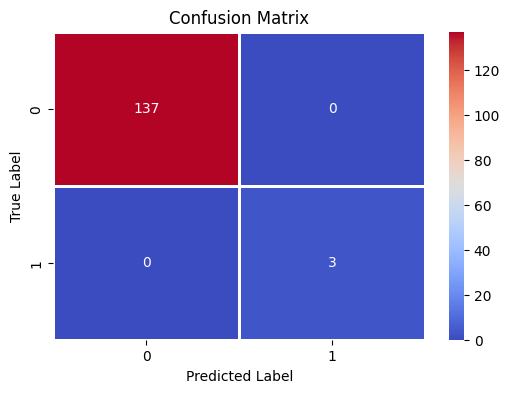

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00         3

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



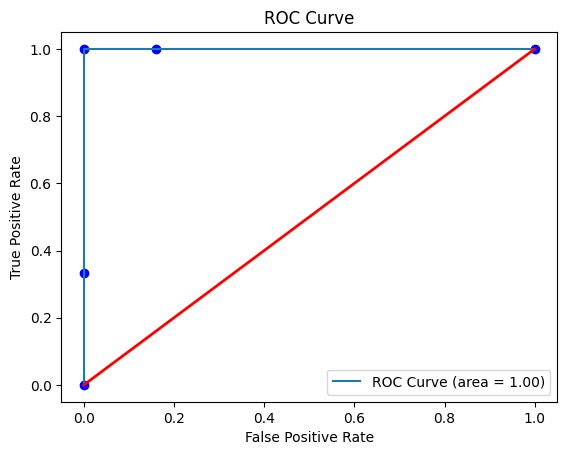

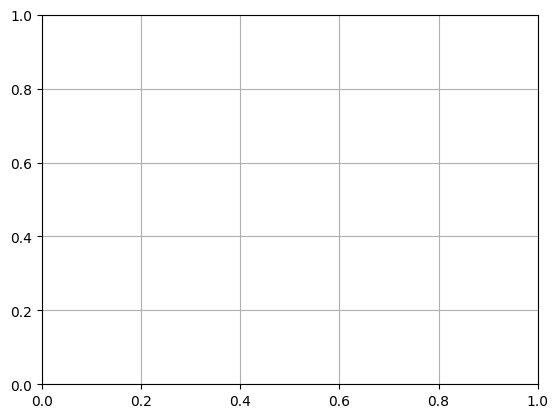

In [315]:

print("Logistic Regression: ")
evaluation(lor, x_test, y_test)



Random Forest: 
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.9785714285714285
Score: 0.9785714285714285
ROC AUC: 0.6350364963503649


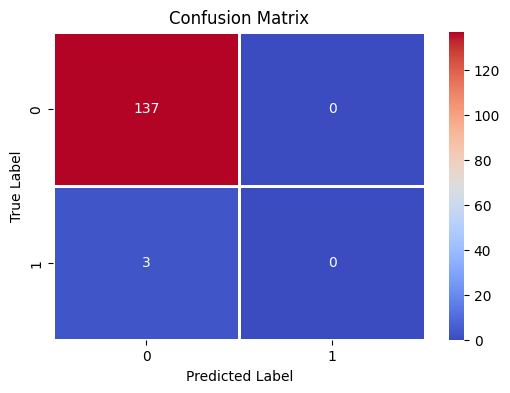

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.98       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.98      0.97       140



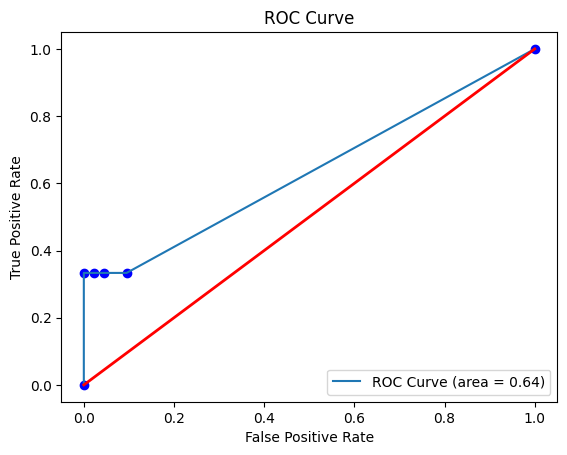

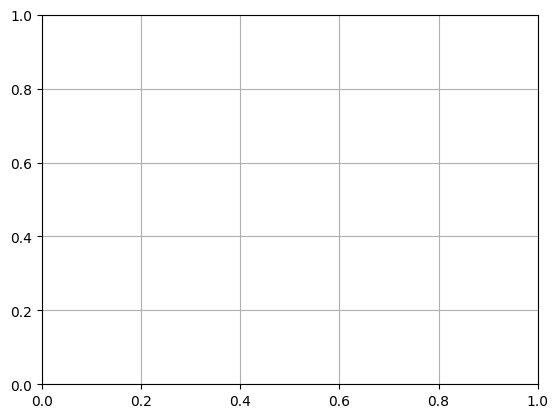

In [316]:
print("Random Forest: ")
evaluation(rf, x_test, y_test)



XGBoost: 
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.9785714285714285
Score: 0.9785714285714285
ROC AUC: 0.8138686131386861


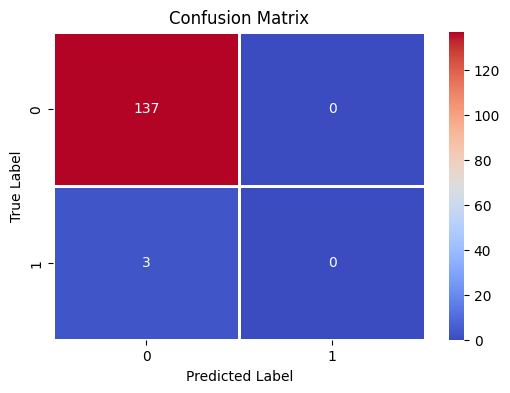

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.98       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.98      0.97       140



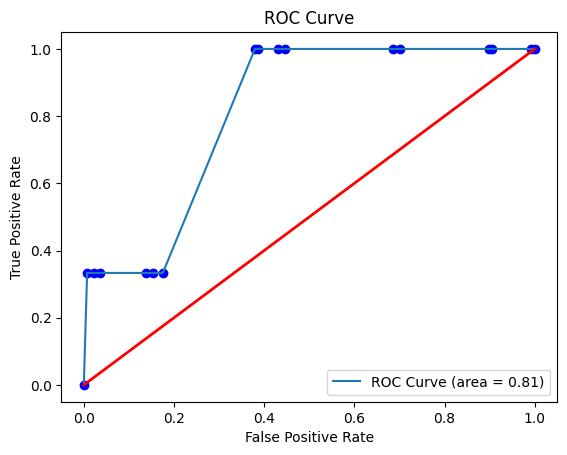

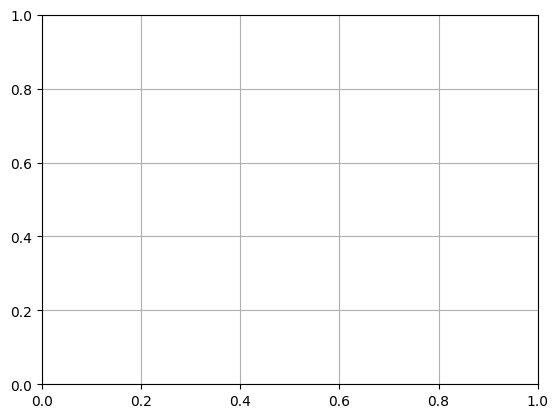

In [317]:
print("XGBoost: ")
evaluation(xgb, x_test, y_test)

In [318]:
data['Transaction_Hour'] = data['Transaction_Date'].dt.hour
data['Transaction_Day'] = data['Transaction_Date'].dt.dayofweek
data['Transaction_Month'] = data['Transaction_Date'].dt.month

In [319]:
data['transaction_count'] = data.groupby('Sender_account')['Transaction_Date'].transform('count')

In [320]:
data['Suspicion_level'] = data['transaction_count'] * data['Amount']
data['average_transaction_amount'] = data.groupby('Sender_account')['Amount'].transform('mean')


In [321]:
data['amount_to_avg_ratio'] = data['Amount'] / (data['average_transaction_amount'] + 1)
# data = pd.get_dummies(data, columns=['ip_addresses'], drop_first=True)

In [322]:
data.head()

,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,...,ip_addresses_98.131.248.68,ip_addresses_98.145.54.164,ip_addresses_98.183.239.247,ip_addresses_98.196.248.83,ip_addresses_98.199.132.55,ip_addresses_98.76.69.193,ip_addresses_99.167.174.194,ip_addresses_99.21.227.221,ip_addresses_99.229.27.71,ip_addresses_99.238.189.2
0,1,PAYMENT,9839.64,3,170136.0,160296.36,ACC18330495,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,PAYMENT,1864.28,202,21249.0,19384.72,ACC43829436,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,TRANSFER,181.00,449,181.0,0.00,ACC19495987,0.0,0.0,1,...,False,False,False,False,False,False,False,False,False,False
3,4,CASH_OUT,181.00,37,181.0,0.00,ACC94944418,21182.0,0.0,1,...,False,False,False,False,False,False,False,False,False,False
4,5,PAYMENT,11668.14,269,41554.0,29885.86,ACC17787237,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [323]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sender_account'] = le.fit_transform(data['Sender_account'])

# data['Receiver_account'] = le.fit_transform(data['Receiver_account'])

In [324]:

if 'Receiver_account' in data.columns:
    data['Receiver_account'] = le.fit_transform(data['Receiver_account'])
else:

    print(f"Available columns: {data.columns}")


Available columns: Index(['Transaction_id', 'Transfer_type', 'Amount', 'Sender_account',
       'Initial_balance_p1', 'new_balance_1', 'Recipient_account',
       'Initial_balance_p2', 'new_balance_2', 'isFraud',
       ...
       'ip_addresses_98.131.248.68', 'ip_addresses_98.145.54.164',
       'ip_addresses_98.183.239.247', 'ip_addresses_98.196.248.83',
       'ip_addresses_98.199.132.55', 'ip_addresses_98.76.69.193',
       'ip_addresses_99.167.174.194', 'ip_addresses_99.21.227.221',
       'ip_addresses_99.229.27.71', 'ip_addresses_99.238.189.2'],
      dtype='object', length=728)


In [325]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

models = [lor, rf, xgb]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
cvz = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model, name in zip(models, model_names):
    scores = cross_val_score(model, x, y, cv=cvz, scoring='accuracy')
    print(f'{name}: Average Accuracy = {scores.mean():.4f} (std = {scores.std():.4f})')


Logistic Regression: Average Accuracy = 0.9971 (std = 0.0057)
Random Forest: Average Accuracy = 0.9914 (std = 0.0029)
XGBoost: Average Accuracy = 0.9929 (std = 0.0045)


In [326]:

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [327]:

random_search_xgb.fit(x_train, y_train)
best_xgb_model = random_search_xgb.best_estimator_
xgb_pred = best_xgb_model.predict(x_test)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)
print(f"XGBoost Test ROC AUC: {xgb_roc_auc:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost Test ROC AUC: 0.5000


In [328]:
# high-risk transaction hours (range I have given 00:00 - 06:00)
data['high_risk_hour(flag)'] = data['Transaction_Hour'].apply(lambda x: 1 if x < 6 else 0)


In [329]:
data.head()

,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,...,ip_addresses_98.131.248.68,ip_addresses_98.145.54.164,ip_addresses_98.183.239.247,ip_addresses_98.196.248.83,ip_addresses_98.199.132.55,ip_addresses_98.76.69.193,ip_addresses_99.167.174.194,ip_addresses_99.21.227.221,ip_addresses_99.229.27.71,ip_addresses_99.238.189.2
0,1,PAYMENT,9839.64,3,170136.0,160296.36,ACC18330495,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,PAYMENT,1864.28,202,21249.0,19384.72,ACC43829436,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,TRANSFER,181.00,449,181.0,0.00,ACC19495987,0.0,0.0,1,...,False,False,False,False,False,False,False,False,False,False
3,4,CASH_OUT,181.00,37,181.0,0.00,ACC94944418,21182.0,0.0,1,...,False,False,False,False,False,False,False,False,False,False
4,5,PAYMENT,11668.14,269,41554.0,29885.86,ACC17787237,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [330]:

from sklearn.model_selection import cross_validate

s1 = cross_validate(lor, x_test, y_test, scoring='recall_macro')
s2 = cross_validate(rf, x_test, y_test, scoring='recall_macro')
s3 = cross_validate(xgb, x_test, y_test, scoring='recall_macro')

print('Logistic Regression Recall Cross-Validation:', np.mean(s1['test_score']))
print('Random Forest Recall Cross-Validation:', np.mean(s2['test_score']))
print('XGBoost Recall Cross-Validation:', np.mean(s3['test_score']))

Logistic Regression Recall Cross-Validation: 0.7891534391534392
Random Forest Recall Cross-Validation: 0.7
XGBoost Recall Cross-Validation: 0.7


In [331]:

param_dist_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}


random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                        param_distributions=param_dist_xgb,
                                        n_iter=50,
                                        cv=5,
                                        scoring='roc_auc',
                                        verbose=1,
                                        n_jobs=-1,
                                        random_state=42)


random_search_xgb.fit(x_train, y_train)

print(f"Best parameters for XGBoost: {random_search_xgb.best_params_}")
print(f"Best ROC AUC: {random_search_xgb.best_score_:.4f}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best ROC AUC: nan


In [332]:
import joblib
# joblib.dump(lor, 'lor_model.pkl')
# joblib.dump(rf, 'rf_model.pkl')
joblib.dump(xgb, 'xgb_model.pkl')

#sinc emy accuracy score in xgb greater


['xgb_model.pkl']

In [333]:
from  google.colab import files
files.download('xgb_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>